# Hurricane Path Prediction 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score, mean_absolute_error

In [41]:
df = pd.read_csv('atlantic.csv')
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [43]:
df.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [44]:
df.isnull().sum()

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [45]:
df.shape

(49105, 22)

In [46]:
def parse_coord(val, is_lat=True):
    if pd.isna(val):
        return np.nan
    s = str(val).strip().upper().replace(" ", "")
    if s.endswith("N"):
        num = s[:-1]
        sign = 1
    elif s.endswith("S"):
        num = s[:-1]
        sign = -1
    elif s.endswith("E"):
        num = s[:-1]
        sign = 1
    elif s.endswith("W"):
        num = s[:-1]
        sign = -1
    else:
        num = s
        sign = 1
    try:
        return float(num) * sign
    except:
        try:
            return float(num.replace("+","").replace(",","")) * sign
        except:
            return np.nan

In [47]:
df_clean = df.copy()
numeric_cols = []

for c in df_clean.columns:
    try:
        pd.to_numeric(df_clean[c]) 
        numeric_cols.append(c)
    except:
        pass

for c in numeric_cols:
    df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

    df_clean.loc[df_clean[c].isin([-999, -99]), c] = np.nan

df_clean["Latitude_num"] = df_clean["Latitude"].apply(lambda x: parse_coord(x, is_lat=True))
df_clean["Longitude_num"] = df_clean["Longitude"].apply(lambda x: parse_coord(x, is_lat=False))


In [48]:
def to_datetime(yymmdd, hhmm):
    try:
        y = int(str(yymmdd)[:4])
        m = int(str(yymmdd)[4:6])
        d = int(str(yymmdd)[6:8])
        tstr = str(int(hhmm)).zfill(4)
        hh = int(tstr[:2])
        mm = int(tstr[2:4])
        return datetime(y, m, d, hh, mm)
    except:
        return pd.NaT

df_clean["DateTime"] = [to_datetime(d, t) for d, t in zip(df_clean["Date"], df_clean["Time"])]
df_clean = df_clean.dropna(subset=["Latitude_num", "Longitude_num", "DateTime"])

df_clean = df_clean.sort_values(["ID", "DateTime"]).reset_index(drop=True)


In [49]:
summary = pd.DataFrame({
    "n_rows": [len(df_clean)],
    "n_storms": [df_clean["ID"].nunique()],
    "date_range_start": [df_clean["DateTime"].min()],
    "date_range_end": [df_clean["DateTime"].max()],
    "lat_min": [df_clean["Latitude_num"].min()],
    "lat_max": [df_clean["Latitude_num"].max()],
    "lon_min": [df_clean["Longitude_num"].min()],
    "lon_max": [df_clean["Longitude_num"].max()]
})

display(summary)  


,n_rows,n_storms,date_range_start,date_range_end,lat_min,lat_max,lon_min,lon_max
0,49105,1814,1851-06-25,2015-11-13 12:00:00,7.2,81.0,-359.1,63.0


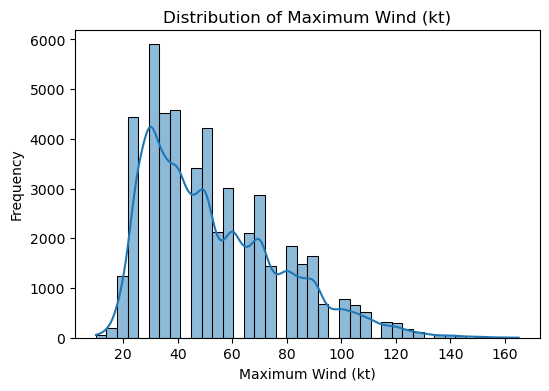

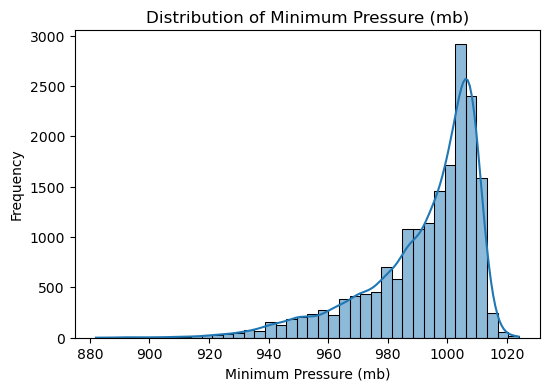

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean["Maximum Wind"].dropna(), bins=40, kde=True)
plt.title("Distribution of Maximum Wind (kt)")
plt.xlabel("Maximum Wind (kt)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_clean["Minimum Pressure"].dropna(), bins=40, kde=True)
plt.title("Distribution of Minimum Pressure (mb)")
plt.xlabel("Minimum Pressure (mb)")
plt.ylabel("Frequency")
plt.show()


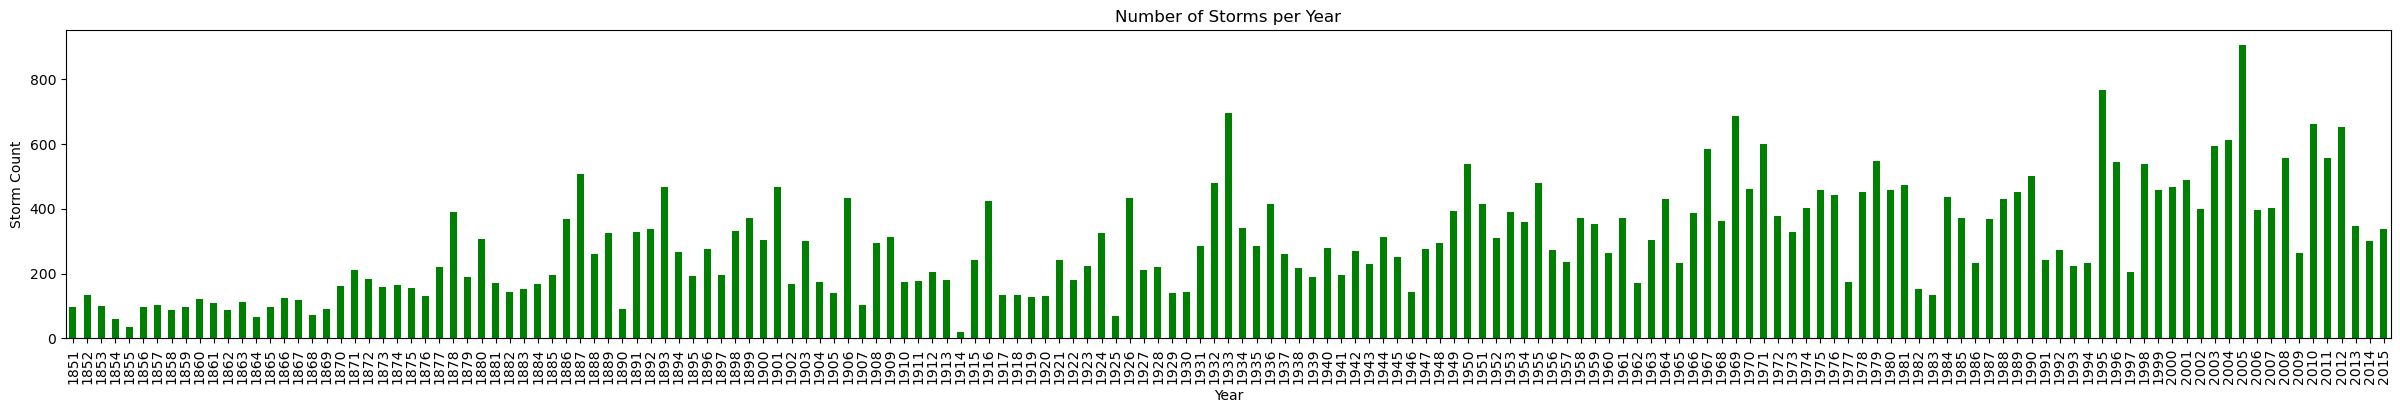

In [51]:
df["Year"] = df["Date"].astype(str).str[:4]
storms_per_year = df.groupby("Year").size()
plt.figure(figsize=(30, 4))
storms_per_year.plot(kind="bar", color="green")
plt.title("Number of Storms per Year")
plt.xlabel("Year")
plt.ylabel("Storm Count")
plt.show()


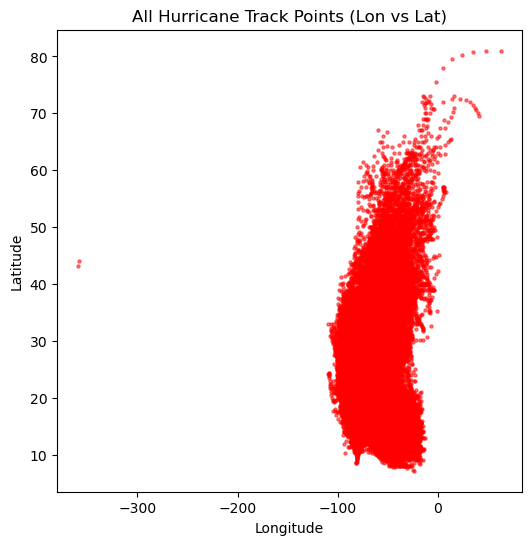

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(
    df_clean["Longitude_num"], 
    df_clean["Latitude_num"], 
    s=5, 
    alpha=0.5, 
    c="red"  
)
plt.title("All Hurricane Track Points (Lon vs Lat)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


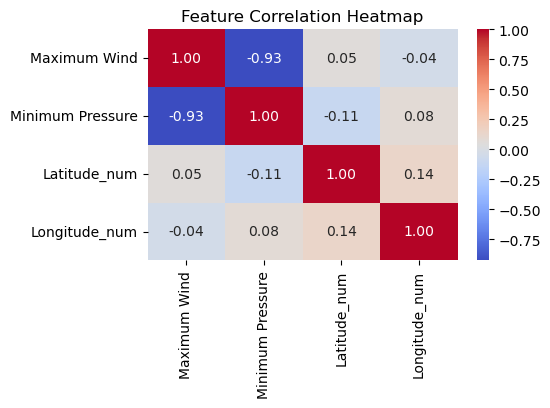


--- Correlation with Hurricane Path ---
                  Latitude_num  Longitude_num
Maximum Wind          0.054247      -0.042533
Minimum Pressure     -0.108077       0.077496
Latitude_num          1.000000       0.136285
Longitude_num         0.136285       1.000000

Selected Features for Hurricane Path Prediction:
['Maximum Wind', 'Minimum Pressure', 'DateTime']


In [54]:
num_cols = ["Maximum Wind", "Minimum Pressure", "Latitude_num", "Longitude_num"]

plt.figure(figsize=(5,3))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

print("\n--- Correlation with Hurricane Path ---")
print(df_clean[num_cols].corr()[["Latitude_num","Longitude_num"]])
selected_features = ["Maximum Wind", "Minimum Pressure", "DateTime"]
print("\nSelected Features for Hurricane Path Prediction:")
print(selected_features)

In [55]:
df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW', 'Year'],
      dtype='object')

In [56]:
df["Latitude_num"] = df["Latitude"].str[:-1].astype(float) * df["Latitude"].str[-1].map({"N": 1, "S": -1})
df["Longitude_num"] = df["Longitude"].str[:-1].astype(float) * df["Longitude"].str[-1].map({"E": 1, "W": -1})

print(df[["Latitude", "Latitude_num", "Longitude", "Longitude_num"]].head())

df = df.sort_values(["ID", "Date"]) 
df["next_lat"] = df.groupby("ID")["Latitude_num"].shift(-1)
df["next_lon"] = df.groupby("ID")["Longitude_num"].shift(-1)
df = df.dropna(subset=["next_lat", "next_lon"])

print(df[["Latitude_num", "Longitude_num", "next_lat", "next_lon"]].head())

  Latitude  Latitude_num Longitude  Longitude_num
0    28.0N          28.0     94.8W          -94.8
1    28.0N          28.0     95.4W          -95.4
2    28.0N          28.0     96.0W          -96.0
3    28.1N          28.1     96.5W          -96.5
4    28.2N          28.2     96.8W          -96.8
   Latitude_num  Longitude_num  next_lat  next_lon
0          28.0          -94.8      28.0     -95.4
1          28.0          -95.4      28.0     -96.0
2          28.0          -96.0      28.1     -96.5
3          28.1          -96.5      28.2     -96.8
4          28.2          -96.8      28.2     -97.0


In [57]:
df["next_lat"] = df.groupby("ID")["Latitude_num"].shift(-1)
df["next_lon"] = df.groupby("ID")["Longitude_num"].shift(-1)
df = df.dropna(subset=["next_lat", "next_lon"])

In [58]:
features = ["Latitude_num", "Longitude_num", "Maximum Wind", "Minimum Pressure"]
target_lat = "next_lat"
target_lon = "next_lon"

X = df[features]
y_lat = df[target_lat]
y_lon = df[target_lon]


In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
def feature_importance_rf(X, y, feature_names, target_name):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = pd.DataFrame({
        "feature": feature_names,
        "importance": rf.feature_importances_
    }).sort_values("importance", ascending=False)
    
    print(f"\nRandom Forest Feature Importances for predicting {target_name}:")
    display(importances)
    return importances

imp_lat = feature_importance_rf(X_scaled, y_lat, features, "Latitude")
imp_lon = feature_importance_rf(X_scaled, y_lon, features, "Longitude")



Random Forest Feature Importances for predicting Latitude:


,feature,importance
0,Latitude_num,0.996738
1,Longitude_num,0.001854
2,Maximum Wind,0.000849
3,Minimum Pressure,0.000559



Random Forest Feature Importances for predicting Longitude:


,feature,importance
1,Longitude_num,0.995755
0,Latitude_num,0.003300
2,Maximum Wind,0.000580
3,Minimum Pressure,0.000364


In [61]:
mi_lat = mutual_info_regression(X_scaled, y_lat, random_state=42)
mi_lon = mutual_info_regression(X_scaled, y_lon, random_state=42)

mi_table = pd.DataFrame({
    "feature": features,
    "MI_with_next_lat": mi_lat,
    "MI_with_next_lon": mi_lon
}).sort_values("MI_with_next_lat", ascending=False)

print("\nMutual Information Scores:")
display(mi_table)


Mutual Information Scores:


,feature,MI_with_next_lat,MI_with_next_lon
0,Latitude_num,2.927719,0.225969
1,Longitude_num,0.211157,2.883243
2,Maximum Wind,0.067858,0.070444
3,Minimum Pressure,0.042228,0.032785


In [62]:
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(
    X_scaled, y_lat, y_lon, test_size=0.2, random_state=42)

In [64]:
rf_lat = RandomForestRegressor(n_estimators=200, random_state=42)
rf_lon = RandomForestRegressor(n_estimators=200, random_state=42)

rf_lat.fit(X_train, y_lat_train)
rf_lon.fit(X_train, y_lon_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [65]:
y_lat_pred = rf_lat.predict(X_test)
y_lon_pred = rf_lon.predict(X_test)


In [66]:
print("Latitude Prediction Performance:")
print("MAE:", mean_absolute_error(y_lat_test, y_lat_pred))
print("R² :", r2_score(y_lat_test, y_lat_pred))

print("\nLongitude Prediction Performance:")
print("MAE:", mean_absolute_error(y_lon_test, y_lon_pred))
print("R² :", r2_score(y_lon_test, y_lon_pred))

Latitude Prediction Performance:
MAE: 0.42354067253228805
R² : 0.9963911150898245

Longitude Prediction Performance:
MAE: 0.6877330476152126
R² : 0.9803675180750098


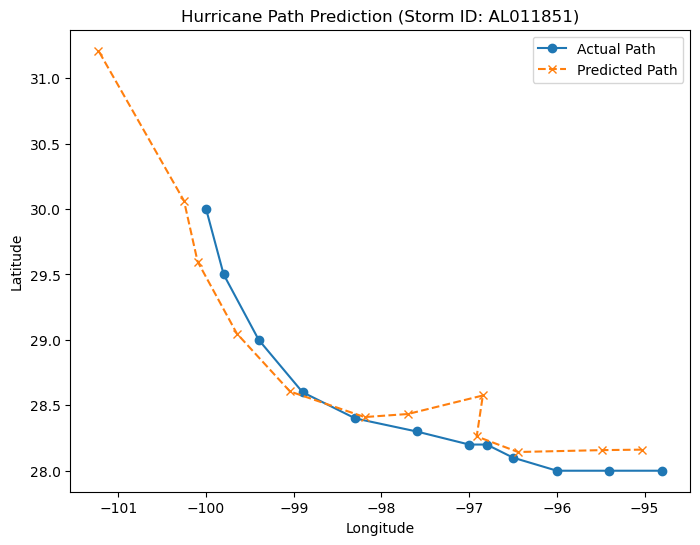

In [67]:
sample_id = df["ID"].iloc[0]  
storm_data = df[df["ID"] == sample_id].copy()

X_storm = scaler.transform(storm_data[features])
storm_data["pred_lat"] = rf_lat.predict(X_storm)
storm_data["pred_lon"] = rf_lon.predict(X_storm)

plt.figure(figsize=(8,6))
plt.plot(storm_data["Longitude_num"], storm_data["Latitude_num"], "o-", label="Actual Path")
plt.plot(storm_data["pred_lon"], storm_data["pred_lat"], "x--", label="Predicted Path")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Hurricane Path Prediction (Storm ID: {sample_id})")
plt.legend()
plt.show()